# PROJECT

Google Play Store team is about to launch a new feature where in certain apps that are 
promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in 
recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). 
These will also get a boost in visibility in search results. This feature will help bring more 
attention to newer apps that have potential

# OBJECTIVES

The objective is to understand what makes an app perform well - size? price? category? or multiple 
factors together? Here we are going to analyze the "playstore-analysis" data, extract some insights and and present these insights using data visualization techniques in a format consumable by business.

In [1]:
# importing some necessary libraries upfront

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file

apps_data=pd.read_csv("playstore-analysis.csv")
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
apps_data.shape

(10841, 13)

It has been seen that there are 10481 rows and 13 features(columns) in our dataset.

# 1. Data clean up – Missing value treatment

In [4]:
# A rough summary of our dataset(understanding the data)

apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
# checking for null values in different columns.

apps_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are 1474 records in 'Rating' column with null values in it that requires attention.
Also there are null values in columns Type(1), Content Rating(1), Currenr Ver(8), Android Ver(3)

#### a] Drop records where Rating is missing since 'Rating' is our target/study variable

In [6]:
# Drop the rows having null values in the 'Rating' field.

apps_data1 = apps_data.dropna(subset=['Rating'])

In [7]:
# Check the number of nulls again

apps_data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Thus the records with null values in the 'Rating' field has been removed.Let's now check the no.of rows and columns under consideration.

In [8]:
apps_data1.shape

(9367, 13)

#### B] Check the null values for the 'Android Ver' column.

In [9]:
# Check the number of nulls in the Android Ver field 

apps_data1["Android Ver"].isnull().sum()

3

In [10]:
# Inspect the nulls in the Android Version column
apps_data1[apps_data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### i) Are all 3 records having the same problem?

No.Carefully observing we can see that the 3rd row in the above shown table is not only having a null vanlue in 'Android Ver' field but also have other problems like data type mismatch in fields like Category,Reviews,Installs,Type,Price,Genre and Last Updated  

In [11]:
# ii) Drop the 3rd row in the above table ie, row with index number 10472.

apps_data2 = apps_data1.drop(10472)

In [12]:
apps_data2[apps_data2['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Yes.that row is now removed.


#### iii) Now let's fill the remaining 2 null rows in 'Android Ver' with the mode values of the same column. 

In [13]:
apps_data2['Android Ver'] = apps_data2['Android Ver'].fillna(apps_data2['Android Ver'].mode()[0])

# New values are
print(apps_data2['Android Ver'].loc[4453])
print(apps_data2['Android Ver'].loc[4490])

4.1 and up
4.1 and up


In [14]:
# Check the nulls in the entire dataframe again
apps_data2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

#### C] Current ver – replace with most common value.

In [15]:
apps_data2['Current Ver'].describe()

count                   9362
unique                  2638
top       Varies with device
freq                    1415
Name: Current Ver, dtype: object

We can see that the 'Current Ver' is column of object data type.So we will be replacing the null values with most common value in the column.'Varies with device' is the most occurring value ie, the mode value of the column.So we will be replacing the null values with this mode value.

In [16]:
#Replace the nulls in the Current version column with the mode value

apps_data2['Current Ver'] = apps_data2['Current Ver'].fillna(apps_data2['Current Ver'].mode()[0])

In [17]:
apps_data2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

So,now we have finished our responsibility of dealing with null values.Let's now look for other anomalies in our dataset.

# 2. Data clean up – correcting the data types

In [18]:
# Summary of a Dataset.
apps_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


#### a] Which all variables need to be brought to numeric types?

In [19]:
#Check the datatypes of all the columns 
apps_data2.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
apps_data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


By analysing the dataset and the datatype of different columns Reviews,Installs and Price needs to be converted to Numeric datatype.Then only that will be become useful for our analysis.

In addition to that the Last updated column also needs to be converted to date type for useful analysis.

#### B] Price variable – remove $ sign and convert to float

In [21]:
apps_data2.Price.value_counts()

0         8719
$2.99      114
$0.99      107
$4.99       70
$1.99       59
          ... 
$2.56        1
$15.99       1
$6.49        1
$13.99       1
$1.75        1
Name: Price, Length: 73, dtype: int64

The '$' sign at the beginning of the numbers is what creating the problem here.So we have to remove them so that we can convert them to numeric data type.

In [22]:
apps_data2['Price'] = apps_data2['Price'].str.replace('$', '')

In [23]:
#converting the data type of the 'Price' column.

apps_data2['Price']=apps_data2['Price'].astype(float)

In [24]:
apps_data2['Price'].dtypes

dtype('float64')

#### C] Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [25]:
apps_data2.Installs.value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

The '+' sign at the end of the numbers and ',' in between are creating the problem here.So we have to remove them so that we can convert them to numeric data type.

In [26]:
apps_data2['Installs'] = apps_data2['Installs'].str.replace('+', '')
apps_data2['Installs'] = apps_data2['Installs'].str.replace(',', '')

In [27]:
# Converting data type of 'Installs' column.

apps_data2['Installs']=apps_data2[['Installs']].astype(int)

In [28]:
apps_data2['Installs'].dtypes

dtype('int32')

#### D] Convert all other identified columns to numeric

In [29]:
#Check the datatypes of all the columns 
apps_data2.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [30]:
apps_data2.Reviews.value_counts()

2         83
3         78
5         74
4         74
1         67
          ..
475020     1
11760      1
417        1
167974     1
4031       1
Name: Reviews, Length: 5992, dtype: int64

Almost all the values in the Reviews column are integers.So we can convert that column to integer data type

In [31]:
apps_data2.Size.value_counts()

21516.529524    1637
14000.000000     166
12000.000000     161
11000.000000     160
15000.000000     159
                ... 
980.000000         1
525.000000         1
14.000000          1
404.000000         1
259.000000         1
Name: Size, Length: 413, dtype: int64

All are integer values in 'Size' column.So let's convert them to integer type.

In addition to these numeric conversions the 'Last Updated' column has date in it.So we are going to convert this to date format as well.

In [32]:
# Changeing the dtype of above mentioned columns
apps_data2['Reviews']=apps_data2['Reviews'].astype(int)
apps_data2['Size']=apps_data2['Size'].astype(int)

#Converting 'Last Updated' to date type.
apps_data2['Last Updated'] = apps_data2['Last Updated'].astype('datetime64[ns]')

In [33]:
#Verify the dtype of columns

print(apps_data2['Reviews'].dtypes)
print(apps_data2['Size'].dtypes)
print(apps_data2['Last Updated'].dtypes)

int32
int32
datetime64[ns]


In [34]:
# Verify all the datatypes of all the columns 
apps_data2.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                       int32
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

# 3. Sanity checks – check for the following and handle accordingly

Now that we have finished data cleaning process,we have to check whether the data in hand makes sense in the given context.For that purpose we have to do some sanity checks.

#### A]  Average rating should be between 1 and 5, as only these values are allowed on the play store.

In [35]:
(apps_data2['Rating']>5).sum()

0

There is no such value in the Rating column.So no further actions required.

#### B] Reviews should not be more than installs as only those who installed can review the app.

In [36]:
apps_data2['Reviews greater than installs']=np.where(apps_data2['Reviews']>apps_data2['Installs'],1,0)

print("No.of apps having reviews greater than the no.of installs : ",apps_data2['Reviews greater than installs'].sum())

No.of apps having reviews greater than the no.of installs :  7


It is understood that there are 7 rows in which the reviews are greater than the number of installs.So we will be removing these 7 records.

In [37]:
#dropping the 7 records based on the condition.

apps_data2.drop(apps_data2[(apps_data2['Reviews greater than installs'])==1].index, axis=0, inplace=True)

In [38]:
#verifying the existence of those 7 records.

print("No.of apps having reviews greater than the no.of installs : ",apps_data2['Reviews greater than installs'].sum())

No.of apps having reviews greater than the no.of installs :  0


Thus the 7 records which were illogical has been removed from our dataset.

Now let's remove the column 'Reviews greater than installs' that we have created for our analysis purpose.


In [39]:
apps_data2.drop('Reviews greater than installs',axis=1,inplace=True)

# 4. Identify and handle outliers –

#### a] Price column

i) Make suitable plot to identify outliers in price

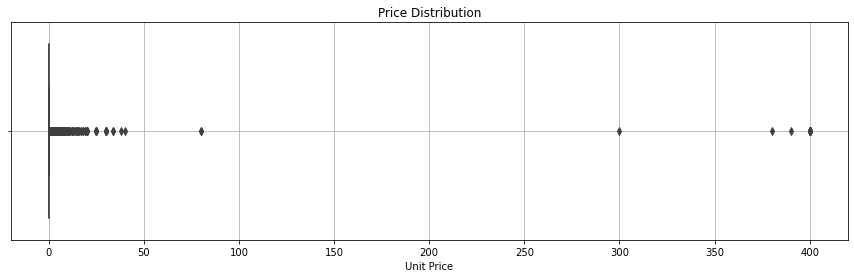

In [40]:
#create a boxplot for the 'Price' column to analyse the outliers.

plt.subplots(figsize=(15,4))
sns.boxplot(apps_data2.Price)

plt.xlabel('Unit Price')
plt.title('Price Distribution')
plt.grid(linestyle='-')

Here we can that there are some extreme values that behaves odd from the group.Let's first treat them and recheck for outliers again.

ii) Do you expect apps on the play store to cost $200? Check out these cases

In [41]:
# Check the apps with price more than 200
apps_data2[apps_data2.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up


In [42]:
#Looking for the count of apps having more than $200 price

print("No.of apps having price greater than $200 : ",apps_data2.Price[apps_data2['Price']>200].count())

No.of apps having price greater than $200 :  15


There are 15 such cases where the 'Price' of the app is greater than $200.

iii) After dropping the useless records, make the suitable plot again to identify
outliers

In [43]:
# dropping off the initial outliers.

apps_data2.drop(apps_data2[apps_data2['Price']>200].index, axis=0, inplace = True)

In [44]:
print("No.of apps having price greater than $200 : ",apps_data2.Price[apps_data2['Price']>200].count())

No.of apps having price greater than $200 :  0


It is irrelevant to compare the free and paid apps together.So let's keep the free apps aside and move forward with the paid apps for further analysis in Price field.

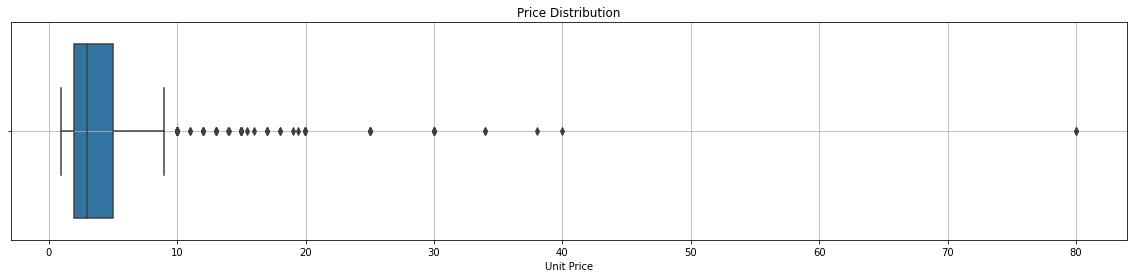

In [45]:
plt.subplots(figsize=(20,4))
sns.boxplot(apps_data2[apps_data2.Price>0].Price)

plt.xlabel('Unit Price')
plt.title('Price Distribution')
plt.grid()


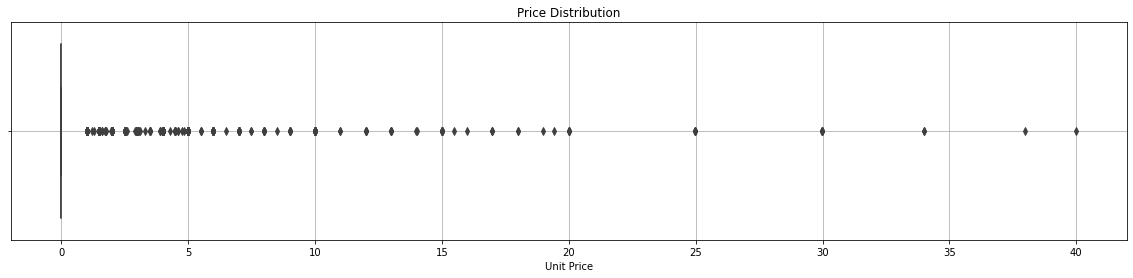

In [46]:
# still there are outliers pesent.So let's now deal remove values above $50 

plt.subplots(figsize=(20,4))
sns.boxplot(apps_data2[apps_data2.Price<50].Price)

plt.xlabel('Unit Price')
plt.title('Price Distribution')
plt.grid()

iv) Limit data to records with price < $30

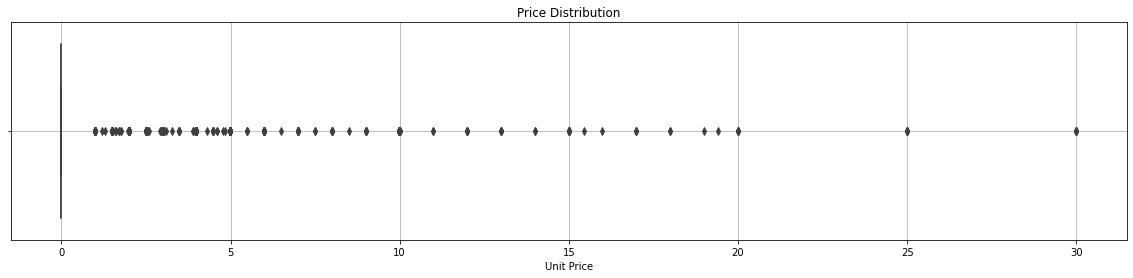

In [47]:
plt.subplots(figsize=(20,4))
sns.boxplot(apps_data2[apps_data2.Price<30].Price)

plt.xlabel('Unit Price')
plt.title('Price Distribution')
plt.grid()

It seems fine when the apps with 'Price' <= 30 are considered.So let's remove the Apps with Price > 30 from our dataset as this won't give us any better results.

In [48]:
#removing the apps with Price > $30.

apps_data2 = apps_data2[apps_data2.Price <= 30]

#checking the no.of apps with Price > $30.
print("No.of apps having price greater than $30 : ",apps_data2[apps_data2.Price > 30].Price.count())

No.of apps having price greater than $30 :  0


#### b] Reviews Column

i) Make suitable plot

Let's choose a bar graph to plot the reviews given for each category.

Text(0.5, 1.0, 'Category VS Reviews')

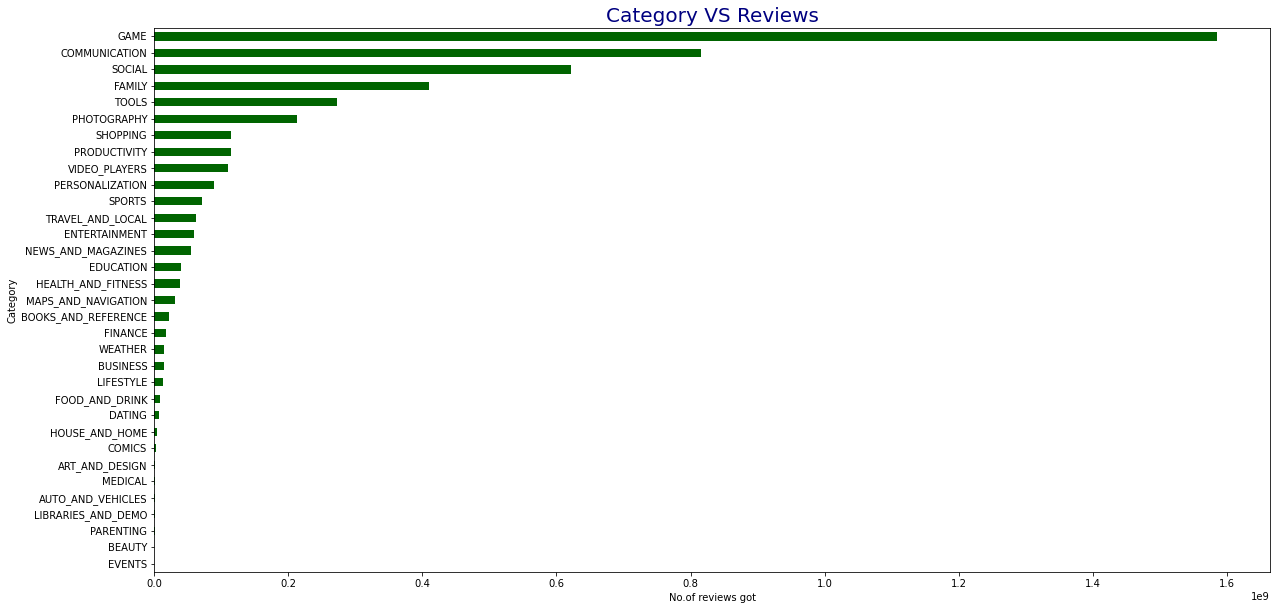

In [49]:
# grouping together the reviews of each category to get the categorywise reviews

Categorywise_reviews=apps_data2.groupby('Category')['Reviews'].sum().sort_values()

plt.subplots(figsize=(20,10))
Categorywise_reviews.plot(kind='barh',color='darkgreen', fontsize=10)
plt.xlabel('No.of reviews got')
plt.title('Category VS Reviews',fontsize=20,color='navy')


In [50]:
print("The top 5 Categories with highest no.of reviews are : \n","\n",Categorywise_reviews.sort_values(ascending=False).head(5))

The top 5 Categories with highest no.of reviews are : 
 
 Category
GAME             1585419555
COMMUNICATION     815461799
SOCIAL            621241071
FAMILY            410221801
TOOLS             273184168
Name: Reviews, dtype: int32


ii) Limit data to apps with < 1 Million reviews

In [51]:
print("No.of apps with reviews greater than 1M : ",apps_data2[apps_data2['Reviews']>=1000000].Reviews.count())

No.of apps with reviews greater than 1M :  704


In [52]:
# Drop the the records having reviews > 1M

apps_data2.drop(apps_data2[apps_data2['Reviews']>=1000000].index, axis=0, inplace=True)

print("No.of apps with reviews greater than 1M : ",apps_data2[apps_data2['Reviews']>=1000000].Reviews.count())

No.of apps with reviews greater than 1M :  0


In [53]:
apps_data2.shape

(8634, 13)

Text(0.5, 1.0, 'Category VS Reviews')

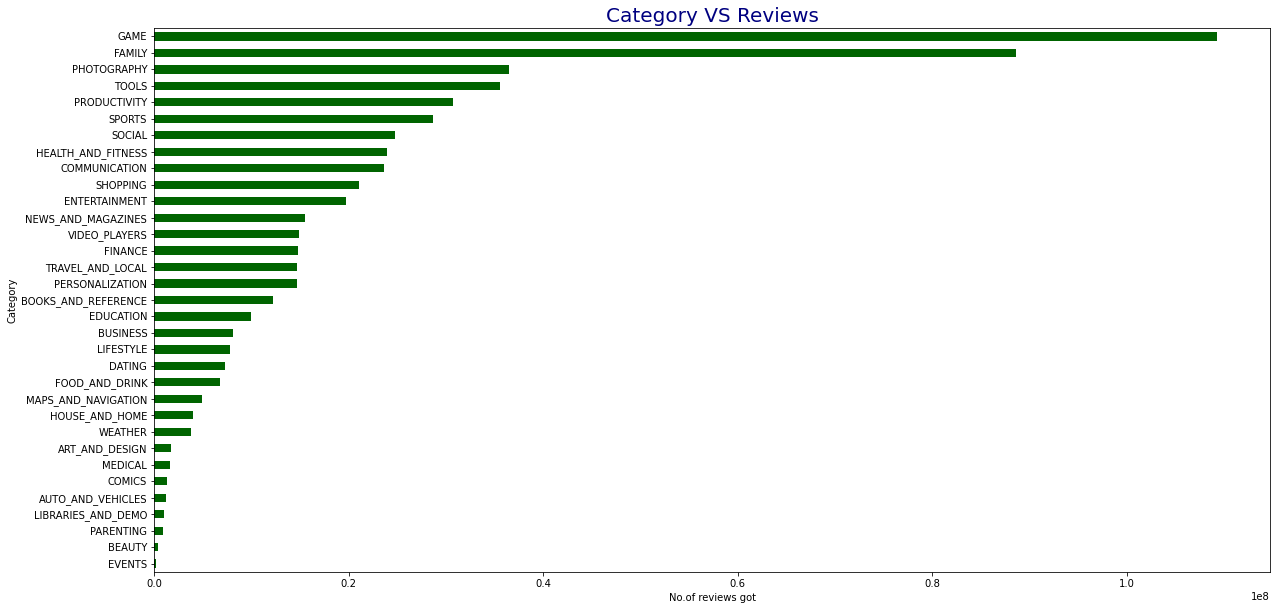

In [54]:
Categorywise_reviews=apps_data2.groupby('Category')['Reviews'].sum().sort_values()

plt.subplots(figsize=(20,10))
Categorywise_reviews.plot(kind='barh',color='darkgreen', fontsize=10)
plt.xlabel('No.of reviews got')

plt.title('Category VS Reviews',fontsize=20,color='navy')


#### c] Installs

i) What is the 95th percentile of the installs?

In [55]:
# 95th Percentile of Installs

per_95 = apps_data2.Installs.quantile(0.95)
print('95th Percentile of Installs : ',per_95)

95th Percentile of Installs :  10000000.0


ii) Drop records having a value more than the 95th percentile

In [56]:
print("Records having more than 95th percentile : ",apps_data2[apps_data2['Installs']>per_95].Installs.count())

Records having more than 95th percentile :  199


In [57]:
# Dropping datas having installs more than the 95th percentile of the same.

apps_data2.drop(apps_data2[ apps_data2['Installs']>per_95 ].index, axis=0, inplace = True )

In [58]:
print("Records having more than 95th percentile : ",apps_data2[apps_data2['Installs']>per_95].Installs.count())

Records having more than 95th percentile :  0


# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

#### A. How do you explain this?

<AxesSubplot:xlabel='Rating', ylabel='Density'>

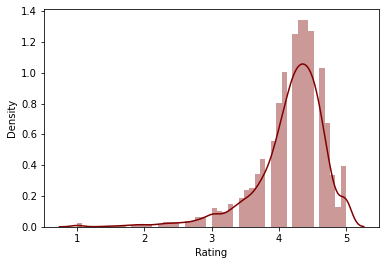

In [59]:
#Plot Rating using a distribution plot

sns.distplot(apps_data2.Rating,color='maroon')

In [60]:
print("Mean : ",round(apps_data2.Rating.mean(),2))
print("Mode : ",apps_data2.Rating.mode())

Mean :  4.17
Mode :  0    4.3
dtype: float64


What we got here is a negatively skewed distribution ie,it’s long tail is on the negative direction on a number line.For a negatively skewed distribution the mean value is less than the mode value.Here we can see that most of the customers gives a higher rating of around 4.3 but the mean of the rating is 4.17.

#### b] What is the implication of this on your analysis?

Real life distributions are not always perfect,in fact most of the data are skewed. If there are too much of skewness in the data the tail region may act as an outlier for the statistical model and that can adversely affect our model's performance and accuracy.
So there is a necessity to transform the skewed data as close enough as to a Gaussian distribution or Normal distribution. This will reduce the effect of skewness and the outliers.

We see here that the rating is mostly concentrated between 4 and 5 and Rating is our important parameter which tells how app is performing.

If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

## 6. What are the top Content Rating values?

#### a] Are there any values with very few records?

In [61]:
#Analyse the Content Rating column

apps_data2['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Here we can see that the 'Adults only 18+' and 'Unrated' are very less in number.So they might not be a useful contribution for our analysis.

#### b] If yes, drop those as they won’t help in the analysis

In [62]:
# Let's see what's there in it. 
apps_data2[(apps_data2['Content Rating']=='Adults only 18+') | (apps_data2['Content Rating']=='Unrated')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900,500000,Free,0.0,Adults only 18+,Comics,2018-07-04,1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000,1000000,Free,0.0,Adults only 18+,Sports,2018-07-24,3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516,500000,Free,0.0,Adults only 18+,Comics,2018-08-03,Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400,50000,Free,0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up


In [63]:
# Drop the above records

apps_data2.drop(apps_data2[(apps_data2['Content Rating']=='Adults only 18+') | (apps_data2['Content Rating']=='Unrated')].index, axis=0, inplace = True)

In [64]:
#let's check what's left with.

apps_data2['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

## 7. Effect of size on rating

#### a] Make a joinplot to understand the effect of size on rating

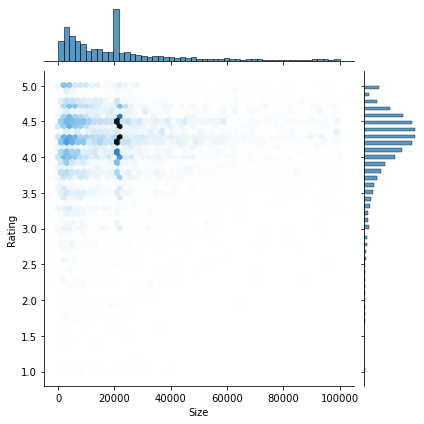

In [65]:
# Plot a joinplot plot for Size and Rating and observe the Effect

sns.jointplot(x ='Size', y ='Rating', data = apps_data2, kind = 'hex')

#### b] Do you see any patterns?

We observed that the maximum data point gather in between Rating 4.0-4.5 and size 0-40000.This shows that apps the with higher ratings are mostly between a size range of 0-4000.This shows that the application size which is in between 0-40000 get a good rating on play store.

#### c] How do you explain the pattern?

Yes.There is correlation between Size and Rating.Carefully observing we can see that the apps with higher size are consistently getting a better feedback where as apps having lower size is getting mixed ratings.Ofcourse the mid sized apps have higher customer feedback,but it maybe because of the large no.of users of those apps.But consistency in rating is shown by the apps with higher file size.

So if the aim is to have more no.of customers it's better to go with a smaller to medium file size and if the objective is to provide quality products to those who can afford it,then we can go with large sized apps as well.

## 8. Effect of price on rating

#### a] Make a jointplot (with regression line)

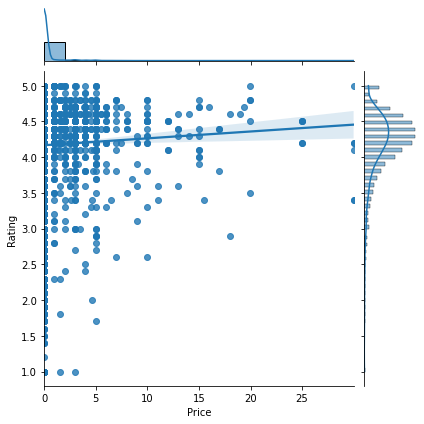

In [66]:
# Plot a reg plot for Price and Rating and observe the trend

sns.jointplot(x='Price', y='Rating', data=apps_data2, kind='reg')

#### b] What pattern do you see?

We can see that the regression line is more or less like a straight line parallel to the x-axis,ie, with the increase of price there is no significant chnage in rating and vice versa.We notice only a slight increase in ratings for high paid apps.In short a slight positive correlation is existing between these two fields.

#### C. How do you explain the pattern?

What we can conclude from the jointplot is that there is only a slight positive correlation among price and rating.Rtaing of the apps shows a  slight increase with the price of the app.But the rating of the apps depends on various other factors rather than price of the apps.So, quality of services provided by the app is what reflected in rating,irrespective of whether the app is paid or not.

#### d] Replot the data, this time with only records with price > 0

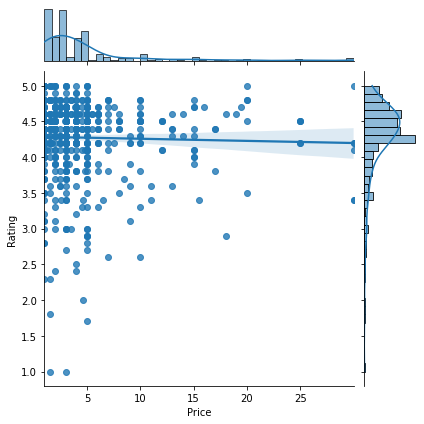

In [67]:
# Plot a jointplot for Price and Rating again for only the paid apps.

sns.jointplot("Price", "Rating", data=apps_data2[apps_data2.Price>0], kind="reg")


#### e] Does the pattern change?

Yes.After considering only the paid apps we can see that the correlation shifts from sllight positive to slight negative correlation.

#### f] What is your overall inference on the effect of price on the rating

After the analysis I could say that there is not much of a correlation between Price and rating.From both the jointplots we saw a very slght correlation ( positive and negative ), which is actually negligible or we can say there is no correlation between these two fields.

We can conclude that the rating of the apps depends on various other factors rather than price of the apps.So, quality of services provided by the app is what reflected in rating,irrespective of whether the app is paid or not.

# 9. Look at all the numeric interactions together –

#### a] Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

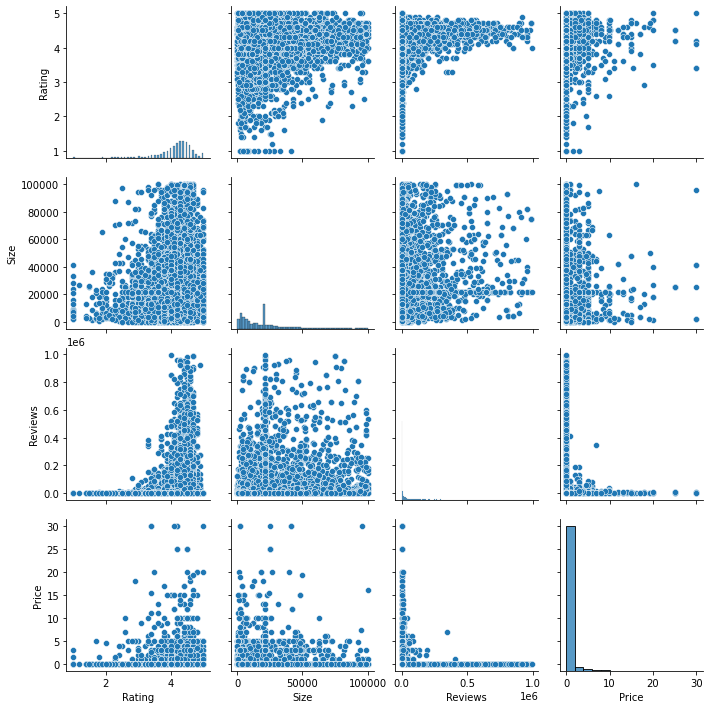

In [68]:
#plotting pairplot with 'Reviews', 'Size', 'Rating' and 'Price'

sns.pairplot(apps_data2,vars=['Rating','Size', 'Reviews', 'Price'])

i) Observing the 'Rating VS size' plot we can find that there is no such apps in the higher size category that has a very poor rating.

ii) There is a direct (exponential to some point ) relationship between reviews and rating.As the no.reviews increases the rating also increases.

iii) Observing the 'Rating VS Price' plot we can find that there is no such apps in the higher Price category that has a very poor rating,ie, almost all high paid apps kept a minimum standard.

iv) From 'Price VS Reviews' plot the no.of reviews are more at price 0.That means,most of the apps in playstore are free and also these free apps are consumed by customers more than that of the paid apps.

# 10. Rating vs. content rating

#### a] Make a bar plot displaying the rating for each content rating



Let's look at the mean rating got by each content rating.

In [69]:
mean_rating = apps_data2.groupby(by=['Content Rating'], as_index=False)['Rating'].mean()
mean_rating

,Content Rating,Rating
0,Everyone,4.169242
1,Everyone 10+,4.218675
2,Mature 17+,4.099760
3,Teen,4.197444


These are the mean values. Let's plot this on a bar graph.

Text(0.5, 1.0, 'Rating VS Content rating')

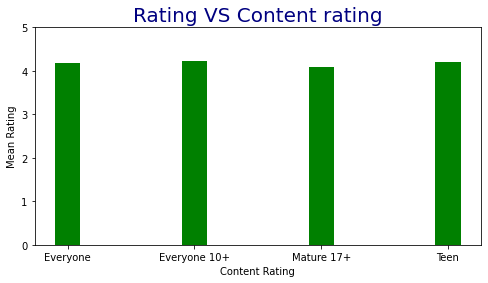

In [70]:
# Plot a bar graph directly between mean of rating and content rating

plt.subplots(figsize=(8,4))
plt.bar(mean_rating['Content Rating'],mean_rating['Rating'],color='green',width=0.2)
plt.xlabel('Content Rating')
plt.ylabel('Mean Rating')
plt.yticks(range(0,6,1))
plt.title('Rating VS Content rating', fontsize=20,color='navy')

#### b] Which metric would you use? Mean? Median? Some other quantile?

We must use Median in this case as we are having a skewed distribution for Rating.In this case median best supports the behaviour of the whole 'Rating' column.So I would suggest to go with median here.

In [71]:
median_rating = apps_data2.groupby(by=['Content Rating'], as_index=False)['Rating'].median()
median_rating

,Content Rating,Rating
0,Everyone,4.3
1,Everyone 10+,4.3
2,Mature 17+,4.2
3,Teen,4.2


This table gives us the median values.Now let's plot this on a Bar graph

Text(0.5, 1.0, 'Average Rating for Each Content rating')

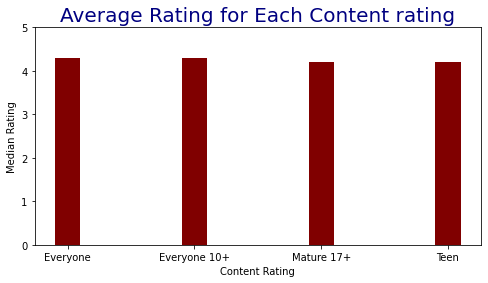

In [72]:
plt.subplots(figsize=(8,4))
plt.bar(median_rating['Content Rating'],median_rating['Rating'],color='maroon',width=0.2)
plt.xlabel('Content Rating')
plt.ylabel('Median Rating')
plt.yticks(range(0,6,1))
plt.title('Average Rating for Each Content rating', fontsize=20,color='navy')

#### c] Choose the right metric and plot

Here we can actually make use of the count plot.The countplot can give the no.of apps in each 'Content rating'.

Text(0.5, 1.0, 'No.of apps in each Content Rating')

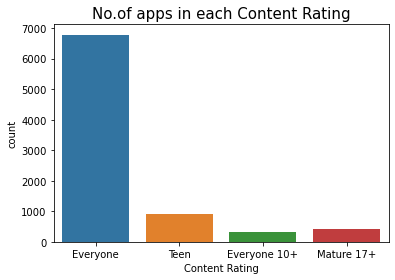

In [73]:
# Plot a count plot of Content Rating 

sns.countplot(x='Content Rating', data=apps_data2)
plt.title("No.of apps in each Content Rating",fontsize=15)

This shows that content of most number of the  apps in the playstore are open to everyone without any restrictions.Or more clearly , we can say that the most number of apps in playstore are from the 'Content Rating' 'Everyone'.

# 11. Content rating vs. size vs. rating – 3 variables at a time

#### a] Create 5 buckets (20% records in each) based on Size

We are going to use pd.qcut function here,because we want to divide the entire distribution into 5 parts that contain 20% data.

In [74]:
## Prepare buckets for the Size column

bins=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels=['1st 20%','2nd 20%','3rd 20%','4th 20%','5th 20%']
apps_data2['Bucket Size'] = pd.qcut(apps_data2['Size'], bins,labels = labels)


Now we are going to deal with 3 variables that includes categorical as well as numerical variables.So it's better to create a pivot table for better understanding and analysis.

#### b] By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [75]:
# Create a pivot table for 'Bucket size' and 'Content Rating' with values set to 'Rating'

pd.pivot_table(apps_data2, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
1st 20%,4.116465,4.188889,3.951429,4.216129
2nd 20%,4.158147,4.207143,4.129592,4.208511
3rd 20%,4.213381,4.245192,4.021705,4.138043
4th 20%,4.170334,4.193443,4.155172,4.192000
5th 20%,4.185690,4.215702,4.193814,4.244483


By default pivot table gives the mean of the values that we gave.So the in above table we have the average rating for different 'Content Rating' for different 'Bucket Size'.

In [76]:
## Now let's Change the aggregation to 20th percentile

pd.pivot_table(apps_data2, values='Rating', index='Content Rating', columns='Bucket Size', aggfunc=lambda x:x.quantile(0.2) )

Bucket Size,1st 20%,2nd 20%,3rd 20%,4th 20%,5th 20%
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.84,3.94,4.1,4.0,4.0
Mature 17+,3.28,3.64,3.7,3.9,4.0
Teen,3.84,3.80,3.9,4.0,4.0


Now, in above table we have the 20th percentile of Rating for different 'Content Rating' and different 'Bucket Size'.

#### c] Make a heatmap of this
#### i] Annotated

In [77]:
pivot_mean = pd.pivot_table(apps_data2, values='Rating', index='Bucket Size', columns='Content Rating')
pivot_20th = pd.pivot_table(apps_data2, values='Rating', index='Content Rating', columns='Bucket Size', aggfunc=lambda x:x.quantile(0.2) )

Text(0.5, 1.0, 'Heat Map Showing Avg Rating ')

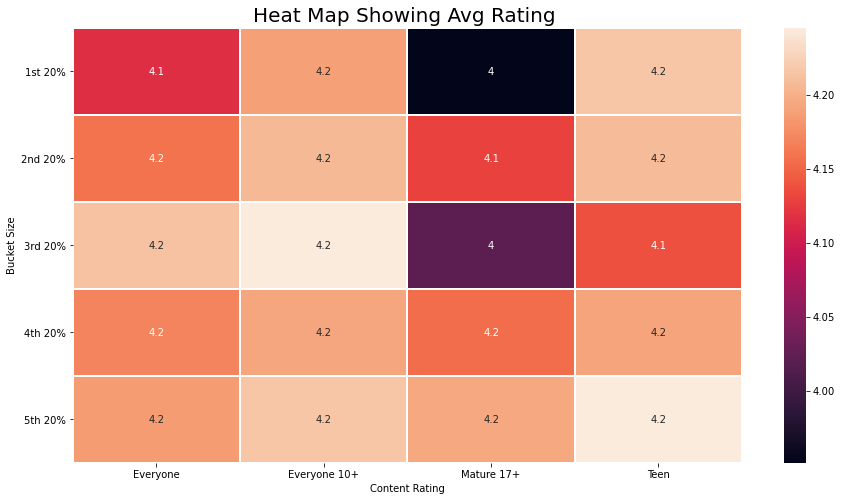

In [78]:
# annotated heatmap showing the pivot table values
plt.figure(figsize=(15,8))
sns.heatmap(pivot_mean, linewidths=1, annot=True)
plt.yticks(rotation = 0)
plt.title("Heat Map Showing Avg Rating ",fontsize=20)

Text(0.5, 1.0, 'Heat Map Showing 20th Percentile Rating  ')

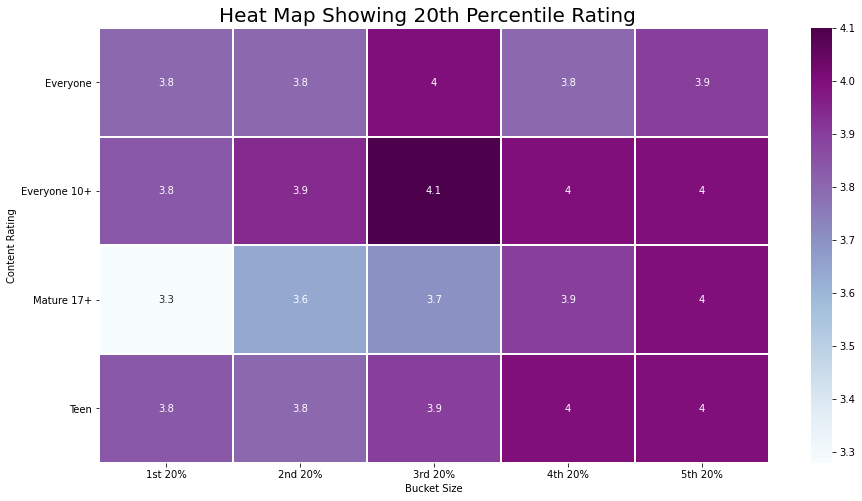

In [79]:
# annotated heatmap showing the pivot table values

plt.figure(figsize=(15,8))
sns.heatmap(pivot_20th, linewidths=1, annot=True,cmap="BuPu")
plt.yticks(rotation = 0)
plt.title("Heat Map Showing 20th Percentile Rating  ",fontsize=20)

#### ii] Greens color map

Text(0.5, 1.0, 'Heat Map Showing 20th Percentile Rating  ')

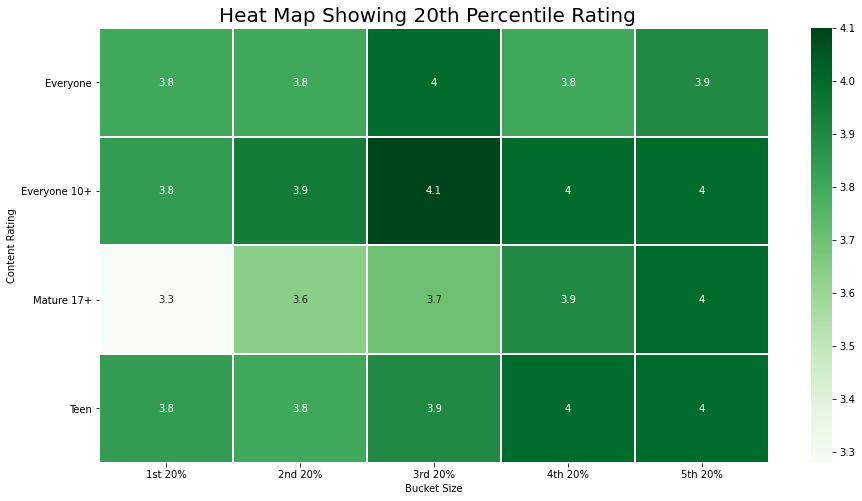

In [80]:
# annotated heatmap showing the pivot table values

plt.figure(figsize=(15,8))
sns.heatmap(pivot_20th, linewidths=1, annot=True,cmap="Greens")
plt.yticks(rotation = 0)
plt.title("Heat Map Showing 20th Percentile Rating  ",fontsize=20)

#### d] What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

We can't explicitly say that lighter apps are preferred or heavier apps are preferred.But the rating for heavier apps are consistently better than lighter apps.

The reason for this maybe, lighter apps have comparatively large number of users which increases the chance for a diversification of it's users.As the diversity increases there is chance for mixed reviews and rating.So that might be one of the reason why the lighter apps are little under rated.

Heavier apps have have comparatively less amount of customers.Moreover heavier apps might be targeting modern gadgets which compells us to make an assumption about customer segement that prefer the heavier apps.

In general,I can't say size of the app has an immense effect, if the app provides a better quality compared to it's competitors.But it is better to maintain an average app size,because a very low app size creates a psychological effect in customer's mind.

$  A $ $brief$  $analysis$  $by$  $Alwin Mathew  $